In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./ner_dataset.csv', encoding='latin1')

In [4]:
df.columns = df.iloc[0]
print(df.columns)
df = df[0:]
df.columns = ['Sentence #','Word','POS','Tag']
df = df.reset_index(drop=True)
df.head()

Index(['Sentence: 1', 'Thousands', 'NNS', 'O'], dtype='object', name=0)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [5]:
df = df.rename(columns={"Sentence #":"sentence#"})

In [37]:
df.head()

,sentence#,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [209]:
df.shape

(1048575, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence#  47959 non-null    object
 1   Word       1048575 non-null  object
 2   POS        1048575 non-null  object
 3   Tag        1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [9]:
data = df[df['sentence#'].notnull()]

In [11]:
data.shape

(47959, 4)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47959 entries, 0 to 1048567
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence#  47959 non-null  object
 1   Word       47959 non-null  object
 2   POS        47959 non-null  object
 3   Tag        47959 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [38]:
data.head()

,sentence#,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
24,Sentence: 2,Families,NNS,O
54,Sentence: 3,They,PRP,O
68,Sentence: 4,Police,NNS,O
83,Sentence: 5,The,DT,O


In [13]:
df.fillna(method='ffill', inplace=True)

In [42]:
df.head(25)

,sentence#,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [24]:
class getsentence(object):
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s:[ (w,p, t) for w,p,t in zip(s['Word'].values.tolist(), s["POS"].values.tolist(), s["Tag"].values.tolist())]   
        self.grouped = self.data.groupby("sentence#").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [25]:
data.head()

,sentence#,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
24,Sentence: 2,Families,NNS,O
54,Sentence: 3,They,PRP,O
68,Sentence: 4,Police,NNS,O
83,Sentence: 5,The,DT,O


In [94]:
getter = getsentence(df)

In [95]:
sentences = getter.sentences
print(sentences[1])

[('Iranian', 'JJ', 'B-gpe'), ('officials', 'NNS', 'O'), ('say', 'VBP', 'O'), ('they', 'PRP', 'O'), ('expect', 'VBP', 'O'), ('to', 'TO', 'O'), ('get', 'VB', 'O'), ('access', 'NN', 'O'), ('to', 'TO', 'O'), ('sealed', 'JJ', 'O'), ('sensitive', 'JJ', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('plant', 'NN', 'O'), ('Wednesday', 'NNP', 'B-tim'), (',', ',', 'O'), ('after', 'IN', 'O'), ('an', 'DT', 'O'), ('IAEA', 'NNP', 'B-org'), ('surveillance', 'NN', 'O'), ('system', 'NN', 'O'), ('begins', 'VBZ', 'O'), ('functioning', 'VBG', 'O'), ('.', '.', 'O')]


In [96]:
words = list(set(data['Word'].values))
n_words = len(words)
print(n_words)

3798


In [97]:
import matplotlib.pyplot as plt

In [211]:
??plt.style.available

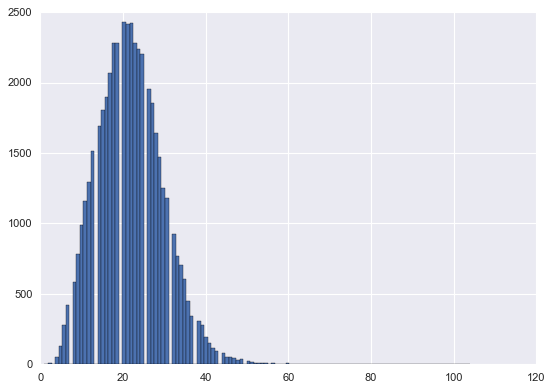

In [219]:
plt.style.use('seaborn')
plt.hist([len(s) for s in sentences], bins=120)
plt.show()

In [119]:
maxlen = max([len(s) for s in sentences])
print('Maximum sentence length: ', maxlen)

Maximum sentence length:  104


In [128]:
df.loc[df['Tag'] == 'B-org', 'Word'].head()

97             Labor
154    International
215             IAEA
234         European
248             U.N.
Name: Word, dtype: object

In [129]:
df.loc[df['Tag'] == 'I-org','Word'].head()

98      Party
155    Atomic
156    Energy
157    Agency
235     Union
Name: Word, dtype: object

In [130]:
df.loc[df['Tag'] == 'B-per','Word'].head()

42          Bush
270    President
331       Thomas
443    President
965      Prophet
Name: Word, dtype: object

In [131]:
df.loc[df['Tag'] == 'I-per','Word'].head()

271        Mahmoud
272    Ahmadinejad
332        Horbach
444      Abdullahi
445          Yusuf
Name: Word, dtype: object

In [132]:
df.loc[df['Tag'] == 'B-geo', 'Word'].head()

6        London
12         Iraq
65         Hyde
94      Britain
106    Brighton
Name: Word, dtype: object

In [133]:
df.loc[df['Tag'] == 'I-geo','Word'].head()

66      Park
347    State
350    State
381    Delta
561     Arab
Name: Word, dtype: object

In [134]:
df.loc[df['Tag'] == 'O','Word'].head()

0        Thousands
1               of
2    demonstrators
3             have
4          marched
Name: Word, dtype: object

In [136]:
# words distribution across Tags
import seaborn as sns

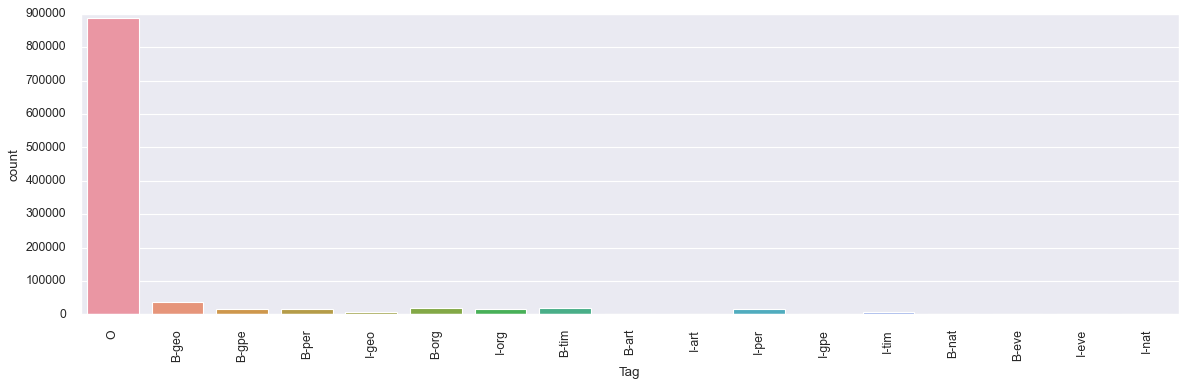

In [165]:
sns.set(color_codes = True)
sns.set(font_scale=1)
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Tag', data=df)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()
plt.show()

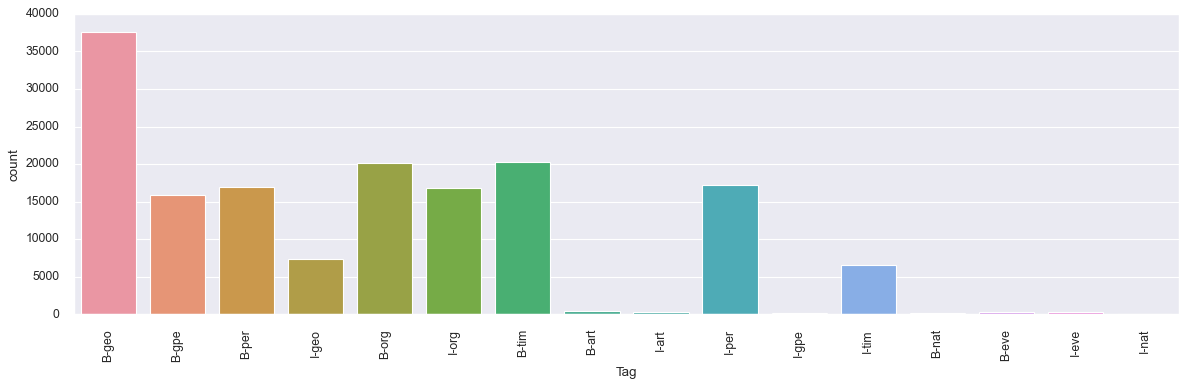

In [177]:
# words distribution across Tags without o tag
sns.set(color_codes = True, font_scale=1)
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df[df['Tag'] != 'O'], x='Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()
plt.show()

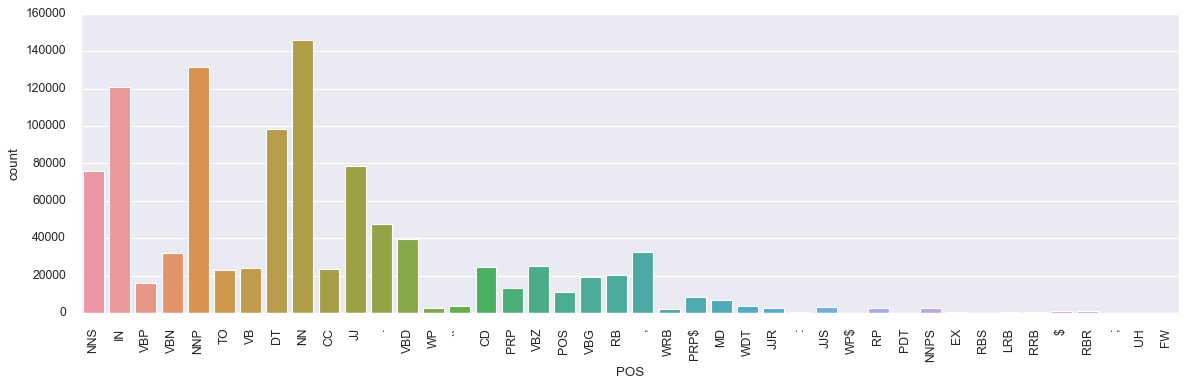

In [181]:
# words distribution across POS
plt.figure(figsize=(15,5))
ax = sns.countplot(x='POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center')
plt.tight_layout()
plt.show()

In [182]:
# simple feature map to feed arrays into the classifier
import numpy as np
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word), word.isdigit(), word.isalpha()])

In [183]:
words = [feature_map(w) for w in df['Word'].values.tolist()]
tags = df['Tag'].values.tolist()

In [187]:
print(words[:5])

[array([1, 0, 0, 9, 0, 1]), array([0, 1, 0, 2, 0, 1]), array([ 0,  1,  0, 13,  0,  1]), array([0, 1, 0, 4, 0, 1]), array([0, 1, 0, 7, 0, 1])]


In [196]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [191]:
# Random Forest classifier 
pred = cross_val_predict(RandomForestClassifier(n_estimators=20), X=words, y=tags, cv=5)

In [194]:
len(pred)

1048575

In [197]:
from sklearn.metrics import classification_report

In [198]:
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00       402
       B-eve       0.00      0.00      0.00       308
       B-geo       0.26      0.79      0.40     37644
       B-gpe       0.26      0.06      0.09     15870
       B-nat       0.00      0.00      0.00       201
       B-org       0.65      0.17      0.27     20143
       B-per       0.97      0.20      0.33     16990
       B-tim       0.29      0.32      0.30     20333
       I-art       0.00      0.00      0.00       297
       I-eve       0.00      0.00      0.00       253
       I-geo       0.00      0.00      0.00      7414
       I-gpe       0.00      0.00      0.00       198
       I-nat       0.00      0.00      0.00        51
       I-org       0.36      0.03      0.06     16784
       I-per       0.47      0.02      0.04     17251
       I-tim       0.50      0.06      0.11      6528
           O       0.97      0.98      0.97    887908

    accuracy              

In [44]:
 # ! pip install sklearn-crfsuite

  Using cached sklearn_crfsuite-0.3.6-py2.py3-none-any.whl (12 kB)
  Using cached python_crfsuite-0.9.7-cp38-cp38-macosx_10_13_x86_64.whl (186 kB)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [237]:
from itertools import chain
# import nltk
# import scipy.stats
import sklearn_crfsuite
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite.metrics import flat_classification_report
# from sklearn_crfsuite import metrics

In [238]:
# Feature set
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

In [239]:
def sent2features(sent):
    return [word2features(sent,i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

In [202]:
# Creating the train and test set
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [240]:
X[0]

[{'bias': 1.0,
  'word.lower()': 'thousands',
  'word[-3:]': 'nds',
  'word[-2:]': 'ds',
  'word.isupper()': False,
  'word.istitle()': True,
  'word.isdigit()': False,
  'postag': 'NNS',
  'postag[:2]': 'NN',
  'BOS': True,
  '+1:word.lower()': 'of',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:postag': 'IN',
  '+1:postag[:2]': 'IN'},
 {'bias': 1.0,
  'word.lower()': 'of',
  'word[-3:]': 'of',
  'word[-2:]': 'of',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': 'IN',
  'postag[:2]': 'IN',
  '-1:word.lower()': 'thousands',
  '-1:word.istitle()': True,
  '-1:word.isupper()': False,
  '-1:postag': 'NNS',
  '-1:postag[:2]': 'NN',
  '+1:word.lower()': 'demonstrators',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:postag': 'NNS',
  '+1:postag[:2]': 'NN'},
 {'bias': 1.0,
  'word.lower()': 'demonstrators',
  'word[-3:]': 'ors',
  'word[-2:]': 'rs',
  'word.isupper()': False,
  'word.istitle()': False,
  'wor

In [248]:
y[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O']

In [241]:
#Creating the CRF model
crf = CRF(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_states=False,
          all_possible_transitions=False)

In [242]:
# ! pip install -U 'scikit-learn<0.24'

In [243]:
#We predcit using the same 5 fold cross validation
pred = cross_val_predict(estimator=crf, X=X, y=y, cv=5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


In [293]:
pred

array([list(['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']),
       list(['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']),
       ...,
       list(['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'B-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])],
      dtype=object)

In [244]:
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


              precision    recall  f1-score   support

       B-art       0.37      0.11      0.17       402
       B-eve       0.52      0.35      0.42       308
       B-geo       0.85      0.90      0.88     37644
       B-gpe       0.97      0.94      0.95     15870
       B-nat       0.66      0.37      0.47       201
       B-org       0.78      0.72      0.75     20143
       B-per       0.84      0.81      0.82     16990
       B-tim       0.93      0.88      0.90     20333
       I-art       0.11      0.03      0.04       297
       I-eve       0.34      0.21      0.26       253
       I-geo       0.82      0.79      0.80      7414
       I-gpe       0.92      0.55      0.69       198
       I-nat       0.61      0.27      0.38        51
       I-org       0.81      0.79      0.80     16784
       I-per       0.84      0.89      0.87     17251
       I-tim       0.83      0.76      0.80      6528
           O       0.99      0.99      0.99    887908

    accuracy              

In [207]:
# Tuning the parameters manually, setting c1=10
crf2 = CRF(algorithm='lbfgs',
           c1=10,
           c2=0.1,
           max_iterations=100,
           all_possible_transitions=False)

In [208]:
pred = cross_val_predict(estimator=crf2, X=X, y=y, cv=5)
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00       402
       B-eve       0.80      0.27      0.40       308
       B-geo       0.82      0.90      0.86     37644
       B-gpe       0.95      0.92      0.94     15870
       B-nat       0.69      0.09      0.16       201
       B-org       0.78      0.67      0.72     20143
       B-per       0.80      0.76      0.78     16990
       B-tim       0.93      0.83      0.88     20333
       I-art       0.00      0.00      0.00       297
       I-eve       0.64      0.12      0.20       253
       I-geo       0.81      0.73      0.77      7414
       I-gpe       0.93      0.37      0.53       198
       I-nat       0.00      0.00      0.00        51
       I-org       0.75      0.76      0.75     16784
       I-per       0.80      0.90      0.85     17251
       I-tim       0.84      0.67      0.74      6528
           O       0.99      0.99      0.99    887908

    accuracy              

In [269]:
crf3 = CRF(algorithm='lbfgs',
         c1=0.1,
         c2=0.1,
         max_iterations=100,
         all_possible_states=False,
         all_possible_transitions=False)
crf3.fit(X=X, y=y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_states=False,
    all_possible_transitions=False, c1=0.1, c2=0.1, keep_tempfiles=None,
    max_iterations=100)

In [342]:
text = [('Chinese', 'JJ'), ('like', 'IN'), ('eating', 'VBG'), ('apples', 'NNS')]
X_test = [sent2features(text)]

In [343]:
y_pred = crf3.predict(X_test)

In [344]:
y_pred

[['B-gpe', 'O', 'O', 'O']]

In [345]:
report3 = metrics.flat_classification_report(y_true=[['B-gpe', 'O', 'O', 'O']], y_pred=y_pred)
print(report3)

              precision    recall  f1-score   support

       B-gpe       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

